Should not have to run this again since data is saved csv file now

In [ ]:
! git clone https://github.com/kaykizzzle/ML-project-1

Cloning into 'ML-project-1'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 18), reused 5 (delta 3), pack-reused 0
Receiving objects: 100% (40/40), 51.12 MiB | 11.82 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [ ]:
# from get_gss.ipynb, provided code to get just needed variables

output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to

modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3): # for each chunk of the data
    # Create url to the chunk to be processed
    url = 'https://github.com/kaykizzzle/ML-project-1/raw/main/gss_chunk_' + str(1+k) + '.parquet'
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode


**RUN STARTING FROM HERE**

**Project Summary:**
>



**Relevant Variables:**

| Variable | Definition |                       
| :---------:| :---------- |  
| year     | year observation was taken |  
| occ10    | occupation of the patient |  
| marital  | participant's marital status |  
| martype  | type of marriage             |  
| age      | age of the participant       |  
| educ     | respondent’s education (numeric variable) |  
| major1   | area or field of study when degree was obtained (highest degree obtained)|  
| sex      | biological sex            |  
| race     | what race the participant considers themselves              |  
| satfin   |  participant’s financial satisfaction (considering themselves and their family)|
| pres20   | who did the respondent vote for in the 2020 election (Biden or Trump)|  
| eqwlth   | should the government reduce income differences (numeric: 1 = the government should reduce income differences; 7 = government should not concern itself with reducing income differences)|        
| tax      | thoughts about income tax (too high, too low, or about right)|  
| relig    | religious preference |
| fepol    | men are better suited emotionally for politics than most women (agree or disagree)|
| owngun   | any guns/revolvers in the house (or garage)|
| helpnot  |  the government should be doing more (to solve problems in our country) or are they doing too much (puts more emphasis on individuals and private businesses); 1 = government should do more; 3 = agree with both; 5 = government does too much|
| sexfreq  | frequency of sexual intercourse over the last 12 months|
| childs   | number of children the participant ever had|
| helpful  | do people try to be helpful or are they looking out for themselves?|
| confinan*  | bank and financial institutions |
| conbus*    | major companies|
| conclerg*  | organized religion|
| coneduc*   | education |
| confed*    | executive branch of the federal government|
| conlabor*  | organized labor|
| conpress*  | press|
| conmedic*  | medicine|
| conjudge*  | U.S. Supreme Court|
| consci*    | scientific community|
| conlegis*  | Congress|
| conarmy*   | military|

(*) These variables measure the respondent's confidence in an institution

**Data Cleaning:**

In [51]:
# import relevant packages, RUN THIS and code chunks below
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# imports selected gss data from csv file, using colab- use /content/ML-project-1/selected_gss_data.csv
df = pd.read_csv('selected_gss_data.csv',low_memory=False)

# List of variables
var_list = ['year','occ10','marital','martype','age','educ','major1','sex','race','satfin','pres20','eqwlth','tax','relig','confinan','conbus','conclerg','coneduc','confed','conlabor','conpress','conmedic','conjudge','consci','conlegis','conarmy','conpharvac','fepol','owngun','helpnot','hlthdep','hlthconf','sexfreq','childs','helpful']

In [ ]:
df.shape

(72392, 35)

In [ ]:
df.describe()

,year,occ10,marital,martype,age,educ,major1,sex,race,satfin,...,conarmy,conpharvac,fepol,owngun,helpnot,hlthdep,hlthconf,sexfreq,childs,helpful
count,72392,67254,72341,5076,71623,72129,7227,72280,72285,67724,...,47804,1164,35699,45865,36777,1129,1134,34521,72131,42221
unique,35,534,6,4,73,22,82,3,4,4,...,4,4,3,4,6,6,6,8,10,4
top,2006,secretaries and administrative assistants,married,marriage between a man and a woman,30.0,12.0,business administration,female,white,more or less satisfied,...,only some,a great deal,disagree,no,3.0,never,never,not at all,0.0,try to be helpful
freq,4510,2727,37590,4999,1571,21401,1072,40301,57657,29987,...,22099,541,25715,27551,14779,386,556,7977,19927,20466


In [52]:
# remove 2 instances of 'varname' from varname from every variable
for var in var_list:
    string = str(var)
    df[string] = df[string].replace(string,np.nan)

df['owngun'] = df['owngun'].replace('refused_(3)', 'refused') # rename confusing variable name

> The data are actually pretty clean besides the 2 weird instances of the var name in most of the variables. While not shown here for space/repition reasons, every variable was looked at with 'value_counts()' and 'describe()'. Additional cleaning is more dependent on what questions are asked and what variables are analyzed. There are a large number of NANs because some of the questions are not asked every year. The confidence questions (our main analysis variables) generally have 40-50k responses (except 'conpharvac'), so it is likely we will only look at the observations that have responses for those questions by narrowing the data with the 'year' variable.

In [53]:
# creating data subset of years that have responses to confidence questions (1973-1984 && 1986-2022)
start_year_index1 = df[df.year == '1973'].index[0]
end_year_index1 = df[df.year == '1985'].index[0]
start_year_index2 = df[df.year == '1986'].index[0]

df_subset1 = df.iloc[int(start_year_index1):int(end_year_index1)] # first data subset from 1973-1984
df_subset2 = df.iloc[int(start_year_index2):-1] # second data subset from 1986-2022
df_subset = pd.concat([df_subset1,df_subset2]) # merges both subsets into complete dataset with years where confidence questions were asked

pd.set_option('display.max_columns', None) # makes sure all columns are displayed

In [54]:
# remove 'conpharvac', 'hlthdep', and 'hlthconf' due to low observation count
# leaving 'pres20' in because it is data from just 1 year so it will be low, plus could be interesting to analyze
df_subset = df_subset.drop(['conpharvac','hlthdep','hlthconf'],axis=1)

print(df_subset.shape)
df_subset.describe()

(69244, 32)


,year,occ10,marital,martype,age,educ,major1,sex,race,satfin,pres20,eqwlth,tax,relig,confinan,conbus,conclerg,coneduc,confed,conlabor,conpress,conmedic,conjudge,consci,conlegis,conarmy,fepol,owngun,helpnot,sexfreq,childs,helpful
count,69242,64558,69191,5073,68485,68984,7224,69130,69135,64588,2395,38757,38764,68815,45238,47257,47380,48399,47726,46402,48082,48500,47165,45751,47697,47801,34230,44333,36774,34518,68993,40629
unique,32,533,5,3,72,21,81,2,3,3,4,7,4,13,3,3,3,3,3,3,3,3,3,3,3,3,2,3,5,7,9,3
top,2006,secretaries and administrative assistants,married,marriage between a man and a woman,32.0,12.0,business administration,female,white,more or less satisfied,biden,1.0,too high,protestant,only some,only some,only some,only some,only some,only some,only some,only some,only some,only some,only some,only some,disagree,no,3.0,not at all,0.0,try to be helpful
freq,4510,2581,35558,4998,1492,20383,1072,38649,54970,28596,1416,8386,23628,38139,25436,29006,24225,27229,23869,26277,24600,22308,24735,22537,25873,22099,24814,26709,14778,7977,19124,19716


In [55]:
# typecast year from strings to int
df_subset['year'] = pd.to_numeric(df_subset['year'], errors = 'coerce')

**Data Exploration:**

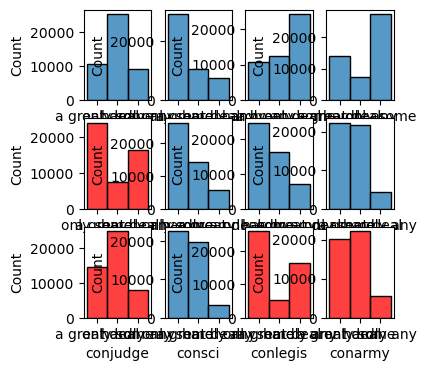

In [12]:
# Histograms, confidence variables. Federal government institutions in red, non-government in blue.
# Note, the label indicating the confidence variable for each plot can be found below the plot.
fig, axs = plt.subplots(3, 4, figsize=(4,4))
# Small figure size for scrolling purposes, can expand to actually read.

sns.histplot(data=df, x='confinan', ax=axs[0, 0])
sns.histplot(data=df, x='conbus', ax=axs[0, 1])
sns.histplot(data=df, x='conclerg', ax=axs[0, 2])
sns.histplot(data=df, x='coneduc', ax=axs[0, 3])
sns.histplot(data=df, x='confed', color='red', ax=axs[1, 0])
sns.histplot(data=df, x='conlabor', ax=axs[1, 1])
sns.histplot(data=df, x='conpress', ax=axs[1, 2])
sns.histplot(data=df, x='conmedic',ax=axs[1, 3])
sns.histplot(data=df, x='conjudge', color='red', ax=axs[2, 0])
sns.histplot(data=df, x='consci', ax=axs[2, 1])
sns.histplot(data=df, x='conlegis', color='red', ax=axs[2, 2])
sns.histplot(data=df, x='conarmy', color='red', ax=axs[2, 3])

plt.show()

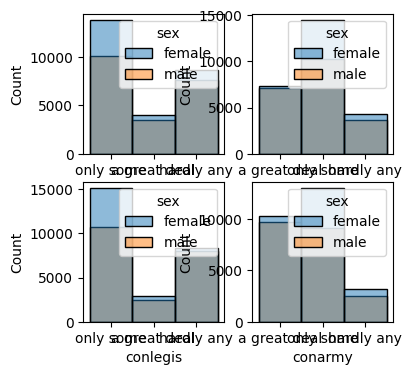

In [ ]:
# The confidence in federal government seems the most interesting.
# Compared to biological sex.

fig, axs = plt.subplots(2, 2, figsize=(4,4))

sns.histplot(data=df, x='confed', hue='sex', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='sex', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='sex', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='sex', ax=axs[1, 1])

plt.show()

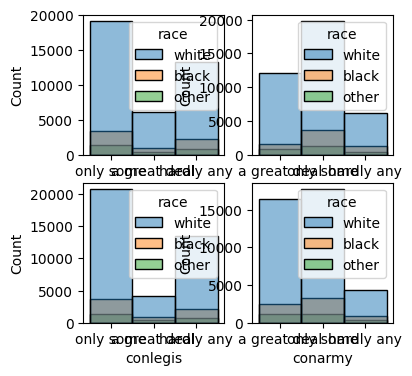

In [ ]:
# Compared to race.
# Note, a majority of respondents are white.

fig, axs = plt.subplots(2, 2, figsize=(4,4))

sns.histplot(data=df, x='confed', hue='race', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='race', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='race', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='race', ax=axs[1, 1])

plt.show()

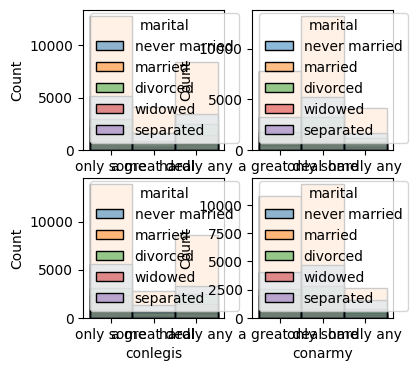

In [ ]:
# Compared to marital status.

fig, axs = plt.subplots(2, 2, figsize=(4,4))

sns.histplot(data=df, x='confed', hue='marital', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='marital', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='marital', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='marital', ax=axs[1, 1])

plt.show()

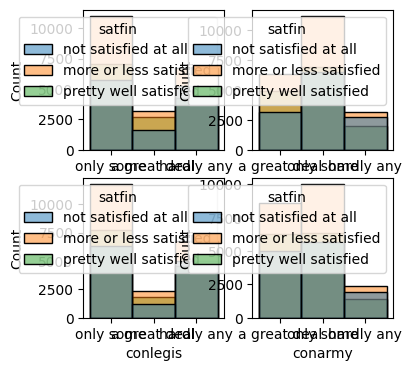

In [ ]:
# Compared to financial satisfaction.

fig, axs = plt.subplots(2, 2, figsize=(4,4))

sns.histplot(data=df, x='confed', hue='satfin', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='satfin', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='satfin', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='satfin', ax=axs[1, 1])

plt.show()

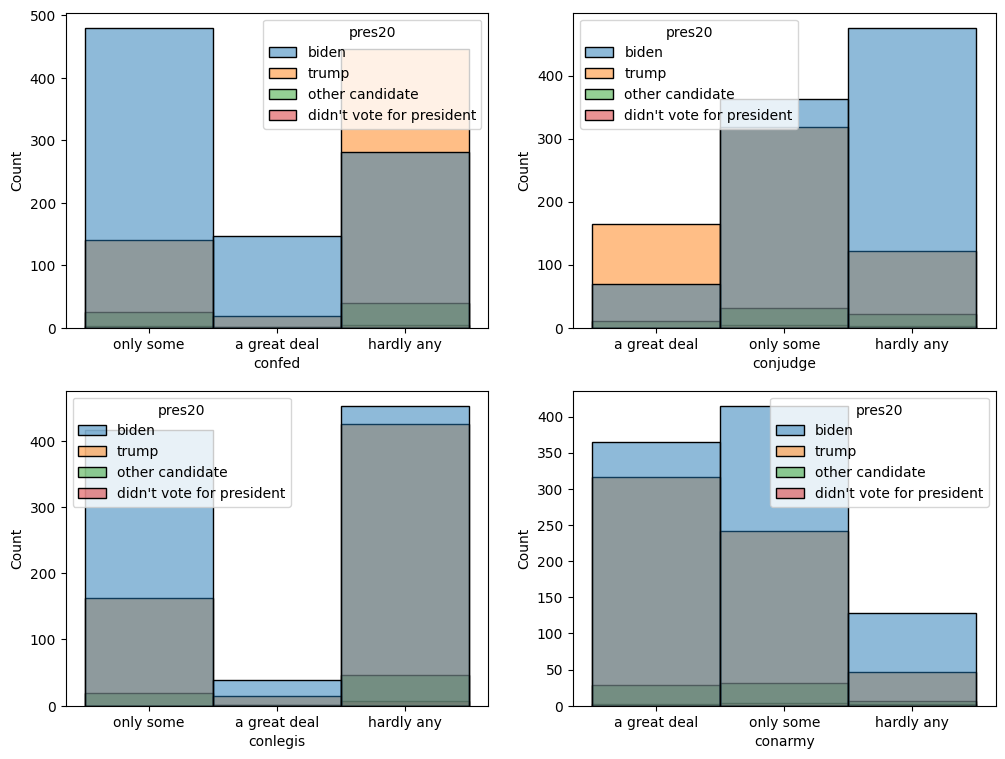

In [ ]:
# Compared to 2020 presidential election vote. <-- most interesting by far!

fig, axs = plt.subplots(2, 2, figsize=(12,9))

sns.histplot(data=df, x='confed', hue='pres20', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='pres20', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='pres20', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='pres20', ax=axs[1, 1])

plt.show()

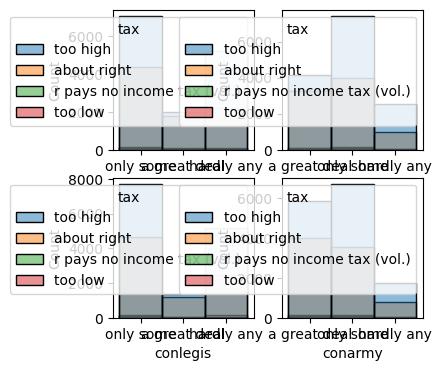

In [ ]:
# Compared to thoughts about income tax.

fig, axs = plt.subplots(2, 2, figsize=(4,4))

sns.histplot(data=df, x='confed', hue='tax', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='tax', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='tax', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='tax', ax=axs[1, 1])

plt.show()

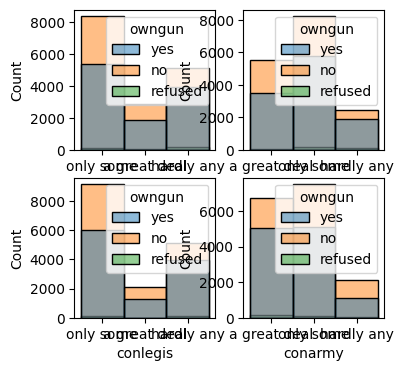

In [ ]:
# Compared to gun ownership.

fig, axs = plt.subplots(2, 2, figsize=(4,4))

sns.histplot(data=df, x='confed', hue='owngun', ax=axs[0, 0])
sns.histplot(data=df, x='conjudge', hue='owngun', ax=axs[0, 1])
sns.histplot(data=df, x='conlegis', hue='owngun', ax=axs[1, 0])
sns.histplot(data=df, x='conarmy', hue='owngun', ax=axs[1, 1])

plt.show()

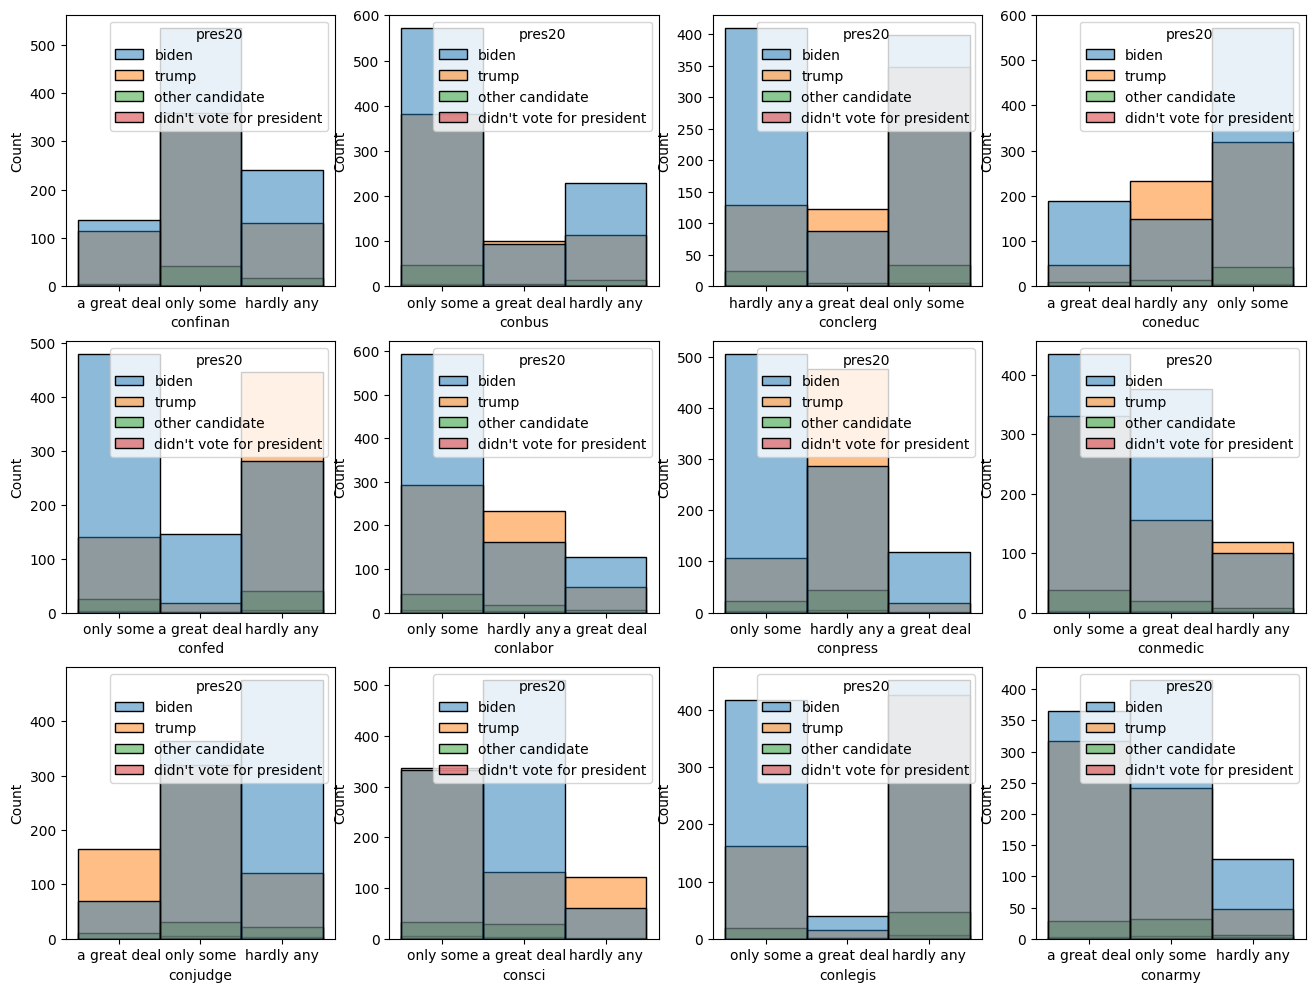

In [ ]:
# 2020 presidential election vote choice vs confidence in all institutions.
fig, axs = plt.subplots(3, 4, figsize=(16,12))

sns.histplot(data=df, x='confinan', hue='pres20', ax=axs[0, 0])
sns.histplot(data=df, x='conbus', hue='pres20',ax=axs[0, 1])
sns.histplot(data=df, x='conclerg', hue='pres20',ax=axs[0, 2])
sns.histplot(data=df, x='coneduc', hue='pres20',ax=axs[0, 3])
sns.histplot(data=df, x='confed', hue='pres20', ax=axs[1, 0])
sns.histplot(data=df, x='conlabor', hue='pres20',ax=axs[1, 1])
sns.histplot(data=df, x='conpress', hue='pres20',ax=axs[1, 2])
sns.histplot(data=df, x='conmedic', hue='pres20',ax=axs[1, 3])
sns.histplot(data=df, x='conjudge', hue='pres20', ax=axs[2, 0])
sns.histplot(data=df, x='consci', hue='pres20',ax=axs[2, 1])
sns.histplot(data=df, x='conlegis', hue='pres20', ax=axs[2, 2])
sns.histplot(data=df, x='conarmy', hue='pres20', ax=axs[2, 3])

plt.show()

**Data Analysis:**

In [ ]:
# We can probably analyze the pres20 and confidence things

In [97]:
# purpose of this code chunk is to create % confidence data over the years per each variable

# gets years and relevant variables and creates a new dataframe to hold the data
years = df_subset['year'].unique()
years = years[~np.isnan(years)]
var_list = ['confinan','conbus','conclerg','coneduc','confed','conlabor','conpress','conmedic','conjudge','consci','conlegis','conarmy']
df_year = pd.DataFrame()
df_year['year'] = years

# nested loops fill new dataframe with confidence of each variable each year
for var in var_list:
    year_data = np.empty((years.shape[0],1)) #initializes empty array
    k = 0
    
    for n in years:
        df_temp = df_subset[df_subset['year'] == n] # gets data corresponding to year n
        n_observations = df_temp.shape[0]  # gets the number of observations of that year (basically value_counts)
        df_temp = df_temp[df_temp[var] == 'a great deal'] # gets data corresponding to high confidence for this variable in year n
        n_confidence = df_temp.shape[0] # gets number of observations with high confidence
        confidence = (n_confidence / n_observations) * 100 # converts to percentage 
        year_data[k] = confidence # adds year data to array
        k = k+1
        
    df_year[var] = year_data # adds array data for one variable to the dataframe
    
df_year.head()

,year,confinan,conbus,conclerg,coneduc,confed,conlabor,conpress,conmedic,conjudge,consci,conlegis,conarmy
0,1973.0,0.000000,29.188830,34.574468,36.768617,29.188830,15.425532,23.005319,53.789894,31.316489,36.702128,23.404255,31.582447
1,1974.0,0.000000,31.334232,44.204852,48.989218,13.611860,18.194070,25.808625,60.309973,33.153639,44.946092,17.048518,39.555256
2,1975.0,31.879195,19.194631,24.295302,30.872483,13.288591,10.067114,23.758389,50.402685,30.671141,37.583893,13.288591,35.167785
3,1976.0,39.359573,21.881254,30.486991,37.224817,13.408939,11.541027,28.285524,53.835891,35.223482,42.561708,13.675784,38.959306
4,1977.0,41.830065,27.124183,39.869281,40.522876,27.843137,14.705882,25.032680,51.372549,35.490196,40.784314,19.019608,36.209150


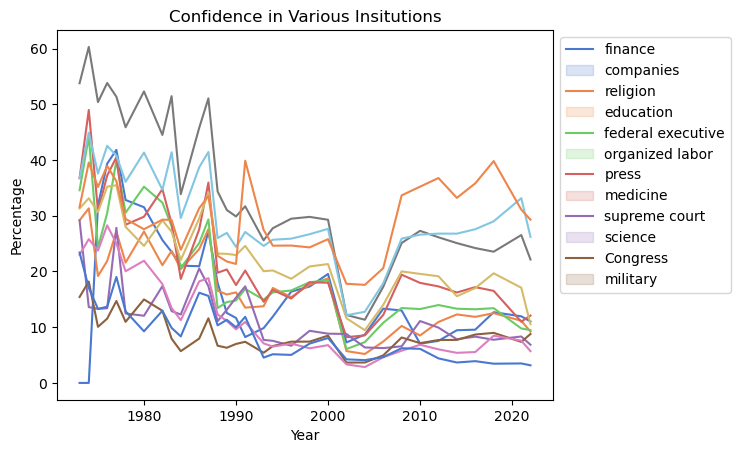

In [127]:
melted_year = df_year.melt(id_vars='year') # melts data for easier line plotting

# plots data
legend_list = ['finance','companies','religion','education','federal executive','organized labor','press','medicine','supreme court','science','Congress','military']
palette = sns.color_palette('muted',12)
sns.lineplot(data=melted_year,x='year',y='value',hue='variable',palette=palette).set(
    title='Confidence in Various Insitutions',xlabel='Year',ylabel='Percentage')
plt.legend(legend_list,bbox_to_anchor=(1, 1))

**Conclusion:**